In [ ]:
import seaborn as sns
import stats
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white", palette="muted", color_codes=True)
np.random.seed(42)

# GMM - Mel & Sid Question

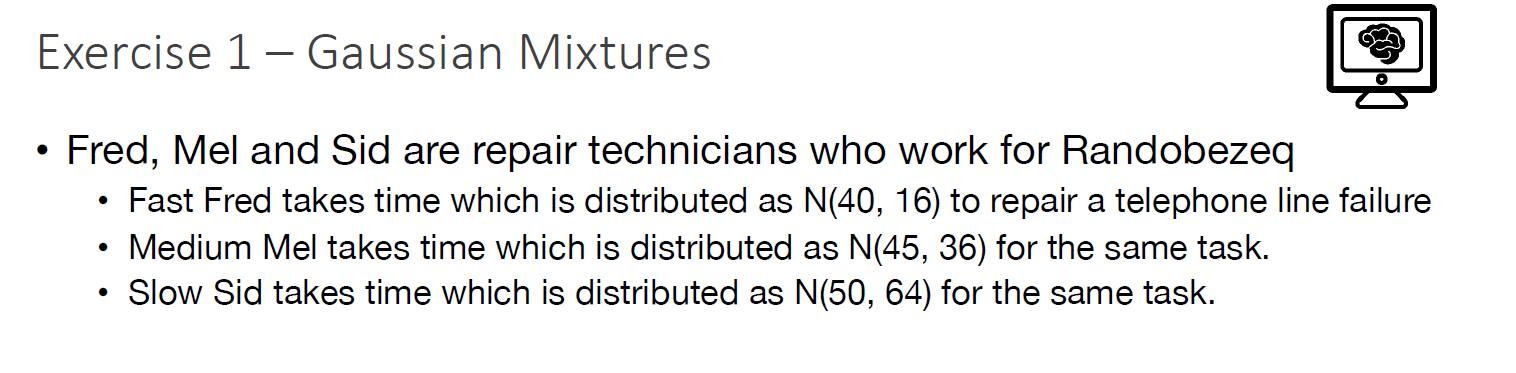

In [ ]:
fred = stats.norm(loc=40, scale=4)
mel = stats.norm(loc=45, scale=6)
sid = stats.norm(loc=50, scale=8)

fred_data = fred.rvs(size=10000)
mel_data = mel.rvs(size=10000)
sid_data = sid.rvs(size=10000)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.distplot(fred_data, ax=ax[0])
ax[0].set_title('Fred', fontdict={'fontsize': 15})

sns.distplot(mel_data, ax=ax[1])
ax[1].set_title('Mel', fontdict={'fontsize': 15})

sns.distplot(sid_data, ax=ax[2])
ax[2].set_title('Sid', fontdict={'fontsize': 15})

plt.show()

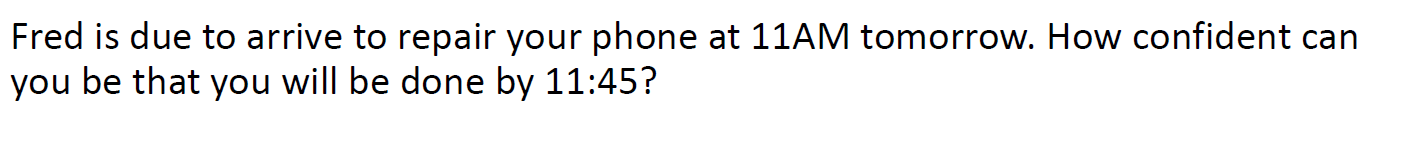

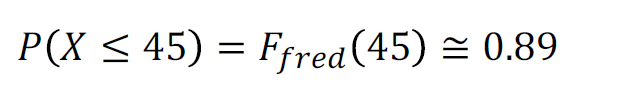

In [ ]:
theoretical = fred.cdf(45)
empirical = (fred_data <= 45).sum() / len(fred_data)

print(f"Theoretical P(X<=45)={theoretical:.4f}")
print(f"Empirical P(X<=45)={empirical:.4f}")

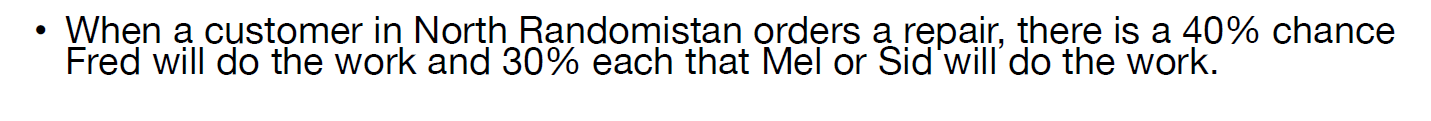

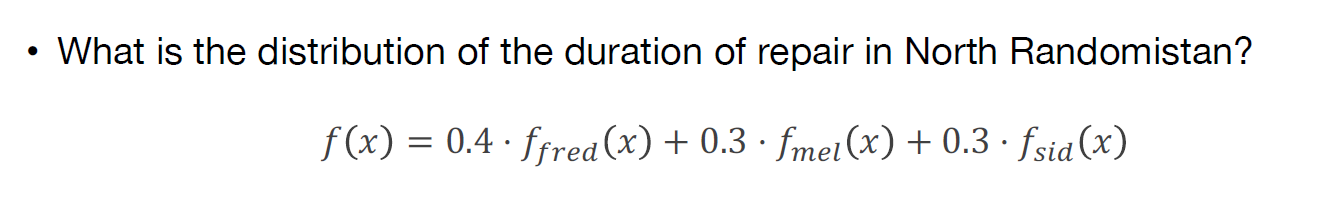

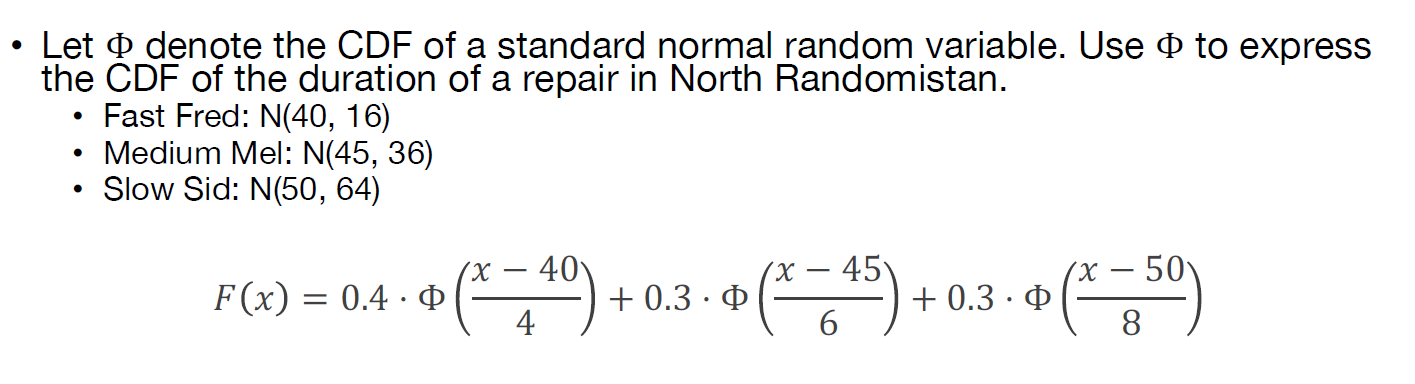

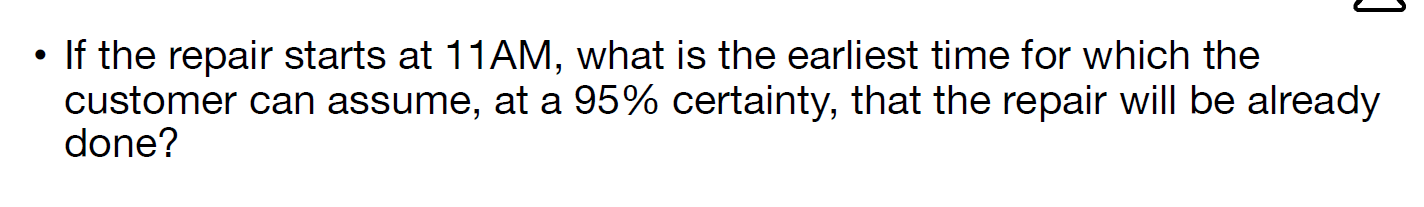

Solve:

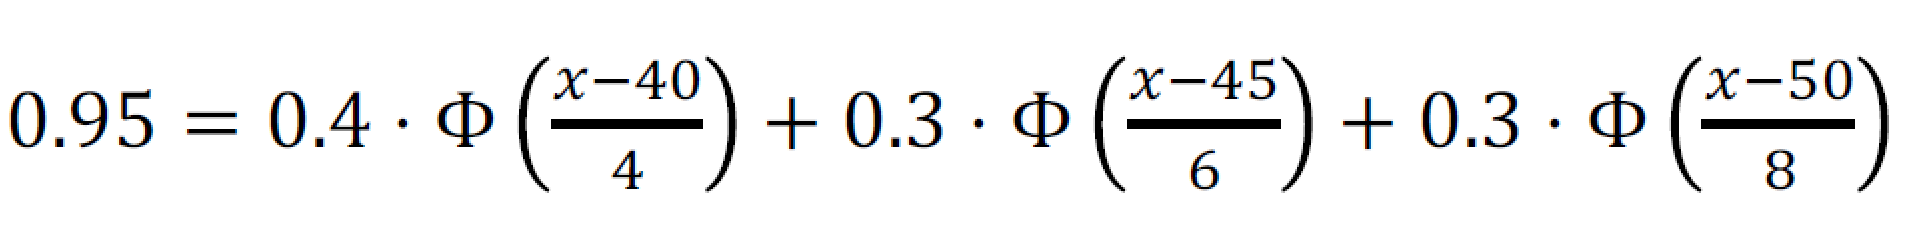

But it is hard to solve for x!
Use Python!

In [ ]:
w_fred = 0.4
w_mel = 0.3
w_sid = 0.3

def gmm_prob(time):
    return w_fred * fred.cdf(time) + w_mel * mel.cdf(time) + w_sid * sid.cdf(time)

time = 0
prob = -1
while prob < 0.95:
    prob = gmm_prob(time)
    time += 1
time -= 1
    
print(f"The earliest time the the customer can assume, at a 95% certainty, that the repair will be completed is: {time}")

print(f"CDF(58) = {gmm_prob(58):.5f}")
print(f"CDF(59) = {gmm_prob(59):.5f}")


# Gaussian Mixtures vs Sum of Gaussians

In [ ]:
loc1, scale1, loc2, scale2, w1, w2 = -10, 1, 9, 2, 0.3, 0.7

first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(first_gaussian, ax=ax[0])
ax[0].set_title('First Gaussian', fontdict={'fontsize': 15})
# ax[0].set_xlim(0, 20)
sns.distplot(second_gaussian, ax=ax[1])
ax[1].set_title('Second Gaussian', fontdict={'fontsize': 15})
# ax[1].set_xlim(0, 20)
plt.show()


In [ ]:
np.concatenate([first_gaussian, second_gaussian]).shape

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([first_gaussian, second_gaussian])
sns.distplot(concated_arrays, bins=50)
ax.set_title('Concatenated Distributions')

In [ ]:
gmm_data = []
for i in range(20000):
    p = stats.uniform.rvs(size=1)
    if p < w1:
        gmm_data.append(np.random.choice(a=first_gaussian, size=1))
    else:
        gmm_data.append(np.random.choice(a=second_gaussian, size=1))
# plot gmm
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(gmm_data, bins=50)
plt.title('GMM')
plt.show()


In [ ]:
# create sum of gaussians data
data = w1 * first_gaussian + w2 * second_gaussian
# plot sum of gaussians
fig = plt.figure(figsize=(10, 6))
sns.distplot(data, bins=50)
plt.title('Sum of Gaussians')
plt.show()
print(data.shape)

In [ ]:
def gmm_vs_2_gaussians(loc1, scale1, loc2, scale2, w1, w2):
    # generate 2 gaussians
    first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
    second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)
    label1 = 'first~N({},{})'.format(loc1,scale1)
    label2 = 'second~N({},{})'.format(loc2,scale2)
    # plotting each one
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.distplot(first_gaussian, ax=ax[0], label=label1)
    ax[0].set_title('First Gaussian', fontdict={'fontsize': 15})
    ax[0].set_xlim(0, 20)
    ax[0].legend()
    sns.distplot(second_gaussian, ax=ax[1],label=label2)
    ax[1].set_title('Second Gaussian', fontdict={'fontsize': 15})
    ax[1].set_xlim(0, 20)
    ax[1].legend()
    plt.show()
    # create the gmm data
    gmm_data = []
    for i in range(10000):
        p = stats.uniform.rvs(size=1)
        if p < w1:
            gmm_data.append(np.random.choice(a=first_gaussian, size=1))
        else:
            gmm_data.append(np.random.choice(a=second_gaussian, size=1))
    # plot gmm
    label_gmm = 'f(x)={}*N({},{})+{}*N({},{})'.format(w1,loc1,scale1,w2,loc2,scale2)
    fig = plt.figure(figsize=(10, 6))
    sns.distplot(gmm_data, bins=50,label=label_gmm)
    plt.title('GMM')
    plt.legend()
    plt.show()
    # create sum of gaussians data
    data = w1 * first_gaussian + w2 * second_gaussian
    # plot sum of gaussians
    label_sum = 'sum~N({},{})'.format(loc1+loc2,scale1+scale2)
    fig = plt.figure(figsize=(10, 6))
    sns.distplot(data, bins=50,label=label_sum)
    plt.title('Sum of Gaussians')
    plt.legend()
    plt.show()
    
    # Mean calculations
    # each gaussian
    print('Gaussians means:')
    print(np.mean(first_gaussian))
    print(np.mean(second_gaussian))
    print('-'*20)
    # sum of gaussians
    print('Sum of Gaussians mean:')
    print('data: {:.2f}'.format(np.mean(data)))
    print('formula: {:.2f}'.format(w1*np.mean(first_gaussian) + w2*np.mean(second_gaussian)))
    print('theoretical formula: {:.2f}'.format(w1*loc1 + w2*loc2))
    print('-'*20)
    # gmm
    print('GMM mean:')
    print('data: {:.2f}'.format(np.mean(gmm_data)))
    print('formula: {:.2f}'.format(w1*np.mean(first_gaussian) + w2*np.mean(second_gaussian)))
    print('theoretical formula: {:.2f}'.format(w1*loc1 + w2*loc2))
    print()
    print()
    
    # Variance calculations
    # each gaussian
    print('Gaussians variances:')
    print(np.var(first_gaussian))
    print(np.var(second_gaussian))
    print('-'*20)
    # sum of gaussians
    print('Sum of Gaussians variance:')
    print('data: {:.2f}'.format(np.var(data)))
    print('formula: {:.2f}'.format(np.power(w1,2)*np.var(first_gaussian) + 
          np.power(w2,2)*np.var(second_gaussian)))
    print('theoretical formula: {:.2f}'.format(np.power(w1,2)*np.power(scale1,2) + 
                                               np.power(w2,2)*np.power(scale2,2)))
    print('-'*20)
    
    
    
    
    # gmm
    print('GMM variance:')
    print('data: {:.2f}'.format(np.var(gmm_data)))
    print('formula: {:.2f}'.format(w1*np.var(first_gaussian) + w2*np.var(second_gaussian) +
          w1*(np.power((np.mean(first_gaussian) - np.mean(gmm_data)), 2)) + 
          w2*(np.power((np.mean(second_gaussian) - np.mean(gmm_data)), 2))))
    print('theoretical formula: {:.2f}'.format(w1*np.power(scale1,2) + w2*np.power(scale2,2) +
          w1*(np.power((loc1 - (w1*loc1 + w2*loc2)), 2)) + 
          w2*(np.power((loc2 - (w1*loc1 + w2*loc2)), 2))))

In [ ]:
gmm_vs_2_gaussians(4, 2, 8, 2, 0.3, 0.7)

In [ ]:
gmm_vs_2_gaussians(2, 1, 10, 2, 0.3, 0.7)

## Empirical GMM - Back to Sid and Mel

In [ ]:
gmm_data = []
gaussians = [fred_data, mel_data, sid_data]
for i in range(20000):
    gaussian_idx = random.choices([0, 1, 2], weights=(w_fred, w_mel, w_sid))[0]
    
    gmm_data.append(np.random.choice(a=gaussians[gaussian_idx], size=1))

gmm_data = np.array(gmm_data)

In [ ]:
def empirical_gmm_prob(time):
    return (gmm_data <= time).sum() / len(gmm_data)

prob = -1
time=0
while prob < 0.95:
    prob = empirical_gmm_prob(time)
    time += 1
time -= 1
    
print(
    f"Empirically, The earliest time the the customer can assume," 
    f"at a 95% certainty, that the repair will be completed is: {time}"
)

print(f"CDF(58) = {empirical_gmm_prob(58):.5f}")
print(f"CDF(59) = {empirical_gmm_prob(59):.5f}")

In [ ]:
sns.histplot(gmm_data, cumulative=False)
plt.show()

In [ ]:
graph = sns.histplot(gmm_data, cumulative=True)

graph.axhline(0.95 * len(gmm_data), color="red", linestyle="--")
graph.axvline(time, color="red", linestyle="--")

plt.show()